## Exercício Semana 12 - Marianna Carvalho (feito com Igea Martins)
# Introdução

O dataset 'titanic.csv' foi retirado do Kaggle e apresenta dados simples sobre os passageiros do Titanic. É uma coleção que contém informações sobre passageiros a bordo do famoso navio Titanic. Inclui variáveis como idade, classe social, sexo e sobrevivência, permitindo análises exploratórias e modelagem preditiva. 

In [14]:
#Dataframe original

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Processamento

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Visualização

### Qual foi a média de idade dos passageiros em relação ao seu sexo:
Pelos dados abaixo podemos ver como a maioria das mulheres passageiras eram mais novas (média de 27 anos) do que os homens (média de 30 anos) sobreviventes no navio. 

In [56]:
df_ordenado = df.sort_values(by='Age', ascending=True)
df_ordenado.shape

(891, 12)

In [57]:
df_ordenado_sem_nan = df_ordenado.dropna(subset=['Age'])
df_ordenado_sem_nan.shape

(714, 12)

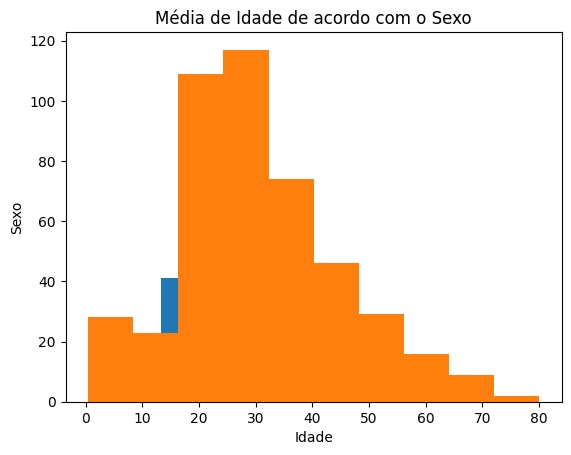

In [55]:
variacao_idade = df_ordenado_sem_nan.groupby('Sex')['Age']
variacao_idade.plot.hist()

plt.xlabel('Idade')
plt.ylabel('Sexo')
plt.title('Média de Idade de acordo com o Sexo')

plt.show()

### Qual foi a média de idade dos sobreviventes em relação ao seu sexo:
Pelos dados abaixo podemos ver como a maioria das mulheres sobreviventes eram mais velhas (média 28 anos) do que os homens (média 27 anos) sobreviventes no navio. Muito embora a maioria das passageiras mulheres fossem mais novas do que os passageiros homens.

In [43]:
df_filtrado1 = df[df['Survived'] == True]
df_filtrado1.shape

(342, 12)

In [40]:
media_idade_genero = df_filtrado1.groupby('Sex')['Age'].mean()
media_idade_genero

Sex
female    28.847716
male      27.276022
Name: Age, dtype: float64

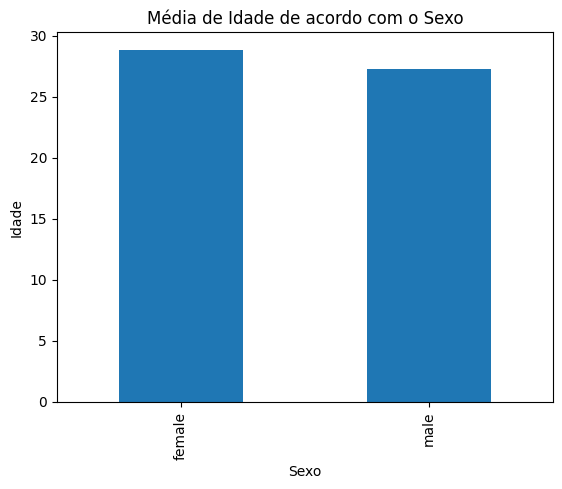

In [41]:
media_idade_genero = df_filtrado1.groupby('Sex')['Age'].mean()
media_idade_genero.plot.bar()

plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.title('Média de Idade de acordo com o Sexo')

plt.show()

### Qual foi a média de sobreviventes por Porto de Embarque:
 - C: Cherbourg
 - Q: Queenstown
 - S: Southampton

 Pelos dados abaixo podemos ver como a maioria dos sobreviventes embarcaram no porto de Cherbourg.

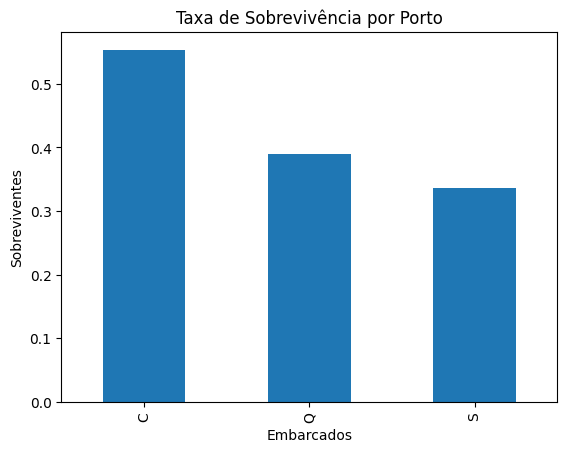

In [23]:
taxa_sob_porto = df.groupby('Embarked')['Survived'].mean()
taxa_sob_porto.plot.bar()

plt.xlabel('Embarcados')
plt.ylabel('Sobreviventes')
plt.title('Taxa de Sobrevivência por Porto')

plt.show()